# Fully Connect Network on Keras

- https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
    1. Data Import
    2. Build Model
    3. Train Model
    4. Evaluate Model
    5. Prediction

In [0]:
%matplotlib inline
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt

## 1. Data Import

In [0]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

## 2. Build Model

In [0]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track


Epoch 1/3
60000/60000 [==============================] - 10s 165us/step - loss: 12.3248 - acc: 0.2346
Epoch 2/3
60000/60000 [==============================] - 9s 152us/step - loss: 12.4417 - acc: 0.2280
Epoch 3/3
60000/60000 [==============================] - 9s 151us/step - loss: 11.9927 - acc: 0.2559


## 3. Train the Model

In [0]:
model.fit(x_train, y_train, epochs=3)  

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## 4. Evaluate the Model

In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 1s 75us/step
0.09406164860930294
0.9695


## 5. Prediction

7


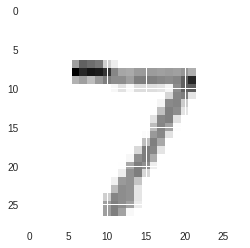

In [0]:
predictions = model.predict(x_test)

import numpy as np

print(np.argmax(predictions[0]))

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()